In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_set = pd.read_csv("house_price.csv")
data_set

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [3]:
data_set.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


##### Mean Function

In [4]:
data_set.price_per_sqft.mean()

7920.336742424242

##### Percentile method

In [5]:
q1=data_set.price_per_sqft.quantile(0.25)
q2=data_set.price_per_sqft.quantile(0.50)
q3=data_set.price_per_sqft.quantile(0.75)

print(q1)
print(q2)
print(q3)

4267.0
5438.0
7317.0


##### IQR

In [6]:
IQR=q3-q1
IQR

3050.0

In [7]:
#finding ouliers
lower_whisker=q1-1.5*IQR
upper_whisker=q3+1.5*IQR
print ("Lower Wisker: ",lower_whisker)
print("Upper Wisker: ",upper_whisker)

Lower Wisker:  -308.0
Upper Wisker:  11892.0


In [8]:
#outliers
data_outlier=data_set[(data_set.price_per_sqft<lower_whisker)|(data_set.price_per_sqft>upper_whisker)]
data_outlier

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.0,4,18181
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
22,Thanisandra,4 Bedroom,2800.0,5.0,380.0,4,13571
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
48,KR Puram,2 Bedroom,800.0,1.0,130.0,2,16250
...,...,...,...,...,...,...,...
13142,other,2 BHK,1140.0,1.0,185.0,2,16228
13157,other,7 Bedroom,1400.0,7.0,218.0,7,15571
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000
13186,other,4 Bedroom,1200.0,5.0,325.0,4,27083


In [9]:
# Non Outlier
data=data_set[(data_set.price_per_sqft>lower_whisker) & (data_set.price_per_sqft<upper_whisker)]
data

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [10]:
data["price_per_sqft"].describe().round()

count    11935.0
mean      5576.0
std       1958.0
min        267.0
25%       4166.0
50%       5188.0
75%       6603.0
max      11875.0
Name: price_per_sqft, dtype: float64

##### Normal Distribution

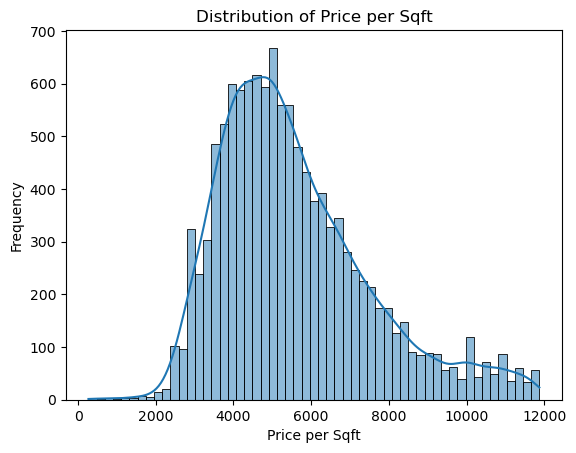

In [11]:
sns.histplot(data['price_per_sqft'], kde=True)
plt.xlabel('Price per Sqft')
plt.ylabel('Frequency')
plt.title('Distribution of Price per Sqft')
plt.show()

##### Z Score

In [12]:
m=data_set.price_per_sqft.mean()
s=data_set.price_per_sqft.std()
print (m)
print(s)

7920.336742424242
106727.16032810845


In [13]:
data_set["Zscore"]=(data_set.price_per_sqft-m)/s
data_set

,location,size,total_sqft,bath,price,bhk,price_per_sqft,Zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.039553
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.030970
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.033875
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.015697
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.034390
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,-0.011537
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,0.029896
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.024945
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407,0.023299


In [14]:
data_set[(data_set.Zscore>-3) & (data_set.Zscore<3)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft,Zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.039553
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.030970
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.033875
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.015697
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.034390
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,-0.011537
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,0.029896
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.024945
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407,0.023299


In [15]:
data1=data_set.drop(["location","size","Zscore"],axis=1)
data1

,total_sqft,bath,price,bhk,price_per_sqft
0,1056.0,2.0,39.07,2,3699
1,2600.0,5.0,120.00,4,4615
2,1440.0,2.0,62.00,3,4305
3,1521.0,3.0,95.00,3,6245
4,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...
13195,3453.0,4.0,231.00,5,6689
13196,3600.0,5.0,400.00,4,11111
13197,1141.0,2.0,60.00,2,5258
13198,4689.0,4.0,488.00,4,10407


In [16]:
cor1=data1.corr()
cor1

,total_sqft,bath,price,bhk,price_per_sqft
total_sqft,1.000000,0.392743,0.574330,0.346013,-0.008267
bath,0.392743,1.000000,0.455998,0.897951,0.030883
price,0.574330,0.455998,1.000000,0.396883,0.028387
bhk,0.346013,0.897951,0.396883,1.000000,0.030955
price_per_sqft,-0.008267,0.030883,0.028387,0.030955,1.000000


<Axes: >

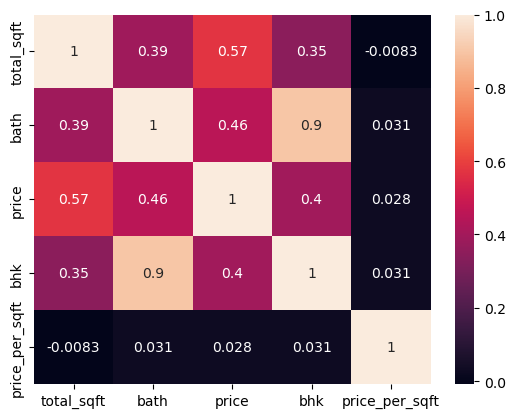

In [17]:
sns.heatmap(cor1,annot=True)

C:\Users\manjo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


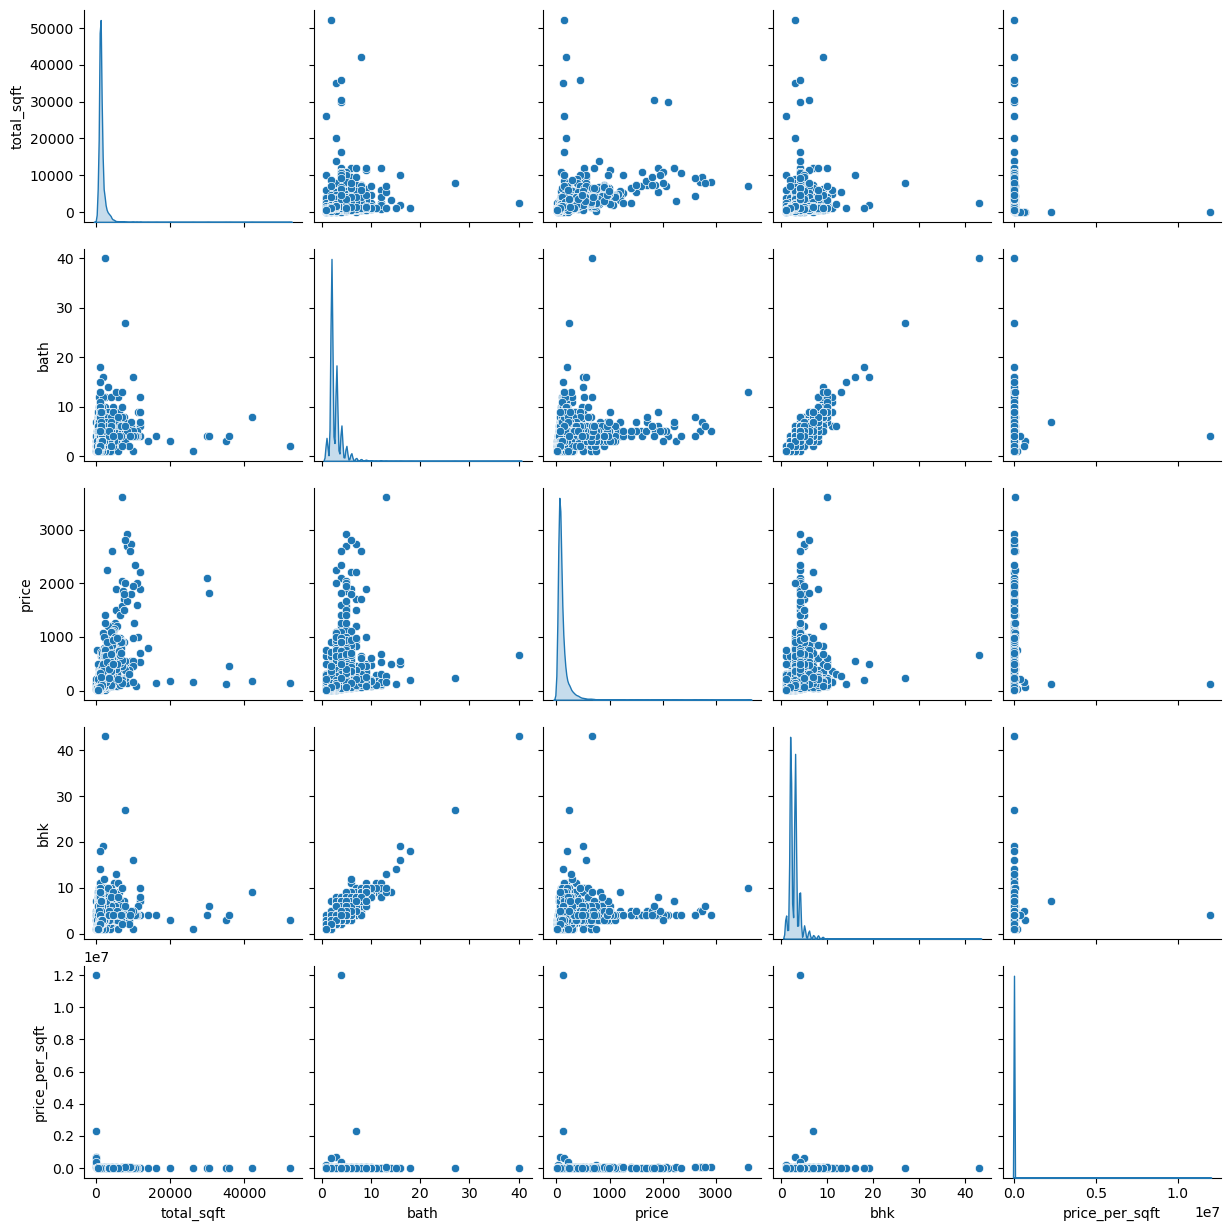

In [19]:
g=data_set.drop(["Zscore"],axis=1)
sns.pairplot(g, diag_kind='kde')